In [1]:
#!conda create --name Sirius_Env python=3.12 -y
#!conda install -c conda-forge libarchive -y
# !conda install -n Sirius_Env numpy pandas matplotlib seaborn scikit-learn jupyterlab notebook -y
# !conda install -n Sirius_Env -c conda-forge geopandas -y
# !conda install -n Sirius_Env -c conda-forge folium -y
# !conda install -n Sirius_Env pytorch torchvision torchaudio cpuonly -c pytorch -y
# !pip install tensorflow
#!brew install poppler
#!conda install -n Sirius_Env -c conda-forge fiona pyogrio -y
#!conda install -n Sirius_Env -c conda-forge gdal

Error while loading conda entry point: conda-libmamba-solver (dlopen(/opt/anaconda3/lib/python3.12/site-packages/libmambapy/bindings.cpython-312-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.20.dylib
  Referenced from: <649CC611-6E3C-3C73-B5F2-9D8AD3C09263> /opt/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/opt/anaconda3/lib/libarchive.20.dylib' (no such file), '/opt/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.20.dylib' (no such file), '/opt/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.20.dylib' (no such file), '/opt/anaconda3/bin/../lib/libarchive.20.dylib' (no such file), '/opt/anaconda3/bin/../lib/libarchive.20.dylib' (no such file), '/usr/local/lib/libarchive.20.dylib' (no such file), '/usr/lib/libarchive.20.dylib' (no such file, not in dyld cache))
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3/envs/Sirius_Env

  added / updated specs:
    - python=3.12


The following pac

In [1]:
#!pip install fiona pyogrio
#!pip install matplotlib-venn

import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import missingno as msno
import pyogrio 


In [42]:
# Load the dataset
file_path = 'FrontDoorImages_Metadata.csv'
Store_data = pd.read_csv(file_path)
Store_data.info()
Store_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                144 non-null    int64  
 1   URL                                       144 non-null    object 
 2   Image_Name                                144 non-null    object 
 3   Folder_Name                               144 non-null    object 
 4   Store_Name                                144 non-null    object 
 5   Store_Category                            144 non-null    object 
 6   Store_Location                            144 non-null    object 
 7   NIMA Model Score                          144 non-null    float64
 8   Rescaled_NIMA Score                       144 non-null    float64
 9   Paq2piq Average Local Score               144 non-null    float64
 10  Rescaled_Paq2piq Average Local Score  

Unnamed: 0                                                URL  \
0           1  https://drive.google.com/file/d/1o8MYSz37M5UU4...   
1           2  https://drive.google.com/file/d/1BCCPVvXNXyelf...   
2           3  https://drive.google.com/file/d/1gltLmIrdjfLl8...   
3           4  https://drive.google.com/file/d/16IYZMQxkUSgBl...   
4           5  https://drive.google.com/file/d/1WD4glNuljbGmd...   

                           Image_Name Folder_Name                  Store_Name  \
0                01_Cafe and Bar.jpeg  Restaurant            Sausage Emporium   
1              02_Coffee and Tea.jpeg  Restaurant  Roy's Station Coffee & Tea   
2  03_UYGHUR CUISINE(HALAL FOOD).jpeg  Restaurant        Kusan Uyghur Cuisine   
3                   04_Asian BBQ.jpeg  Restaurant            Santo Market Inc   
4                   05_Ice cream.jpeg  Restaurant     Rocko's Ice Cream Tacos   

        Store_Category   Store_Location  NIMA Model Score  \
0  American Restaurant       Sonoma, CA          5.295616   
1          Coffee Shop     San Jose, CA          5.328206   
2     Halal Restaurant     San Jose, CA          5.996011   
3     Asian Restaurant     San Jose, CA          4.907205   
4           Sweet Shop  Santa Clara, CA          5.857510   

   Rescaled_NIMA Score  Paq2piq Average Local Score  ...  \
0             4.609049                    65.854324  ...   
1             5.248884                    67.560623  ...   
2             6.862394                    66.763580  ...   
3             3.683365                    68.687195  ...   
4             4.742850                    65.636642  ...   

                                    Neuron_Strengths  \
0  Impactful Branding: The "Sausage Emporium" sig...   
1  Welcoming Ambiance: The outdoor seating and gr...   
2  Cultural Appeal: The storefront's use of bilin...   
3  Rustic Charm: The brick facade and metal sign ...   
4  Playful Design: The dog logo adds a fun and fr...   

                           Neuron_Strengths_Keywords  \
0  Impactful Branding, Comprehensive Offerings Di...   
1                Welcoming Ambiance, Clever Branding   
2               Cultural Appeal, Eye-catching Colors   
3                      Rustic Charm, Clear Offerings   
4                    Playful Design, Bright Colors\n   

                         Neuron_Heatmap_Observations  \
0  Signage Focus: The heatmap shows significant a...   
1  Focus on Signage: The heatmap shows strong att...   
2  Focus on Red Doors: The heatmap indicates stro...   
3  High Focus on Entrance: The heatmap indicates ...   
4  High Focus on Logo: The heatmap shows signific...   

  Neuron_Heatmap_Observations_Keywords  \
0    Signage Focus, Details Engagement   
1      Signage Focus, Decor Engagement   
2            Door Focus, Signage Focus   
3           Entrance Focus, Menu Signs   
4           Logo Focus, Window Signage   

                                   Neuron_Suggestion  \
0  Enhance Entrance Design: Add subtle lighting o...   
1  Enhance Lighting: Add soft lighting to the sig...   
2  Highlight Signage: Use lighting or a contrasti...   
3  Enhance Menu Visibility: Use larger fonts or r...   
4  Highlight Store Name: Increase the size or bri...   

                 Neuron_Suggestion_Keywords Neuron_Focus  \
0     Enhance Entrance, Interactive Visuals         57.0   
1         Enhance Lighting, Wayfinding Cues         53.0   
2  Highlight Signage, Improve Accessibility         93.0   
3         Menu Visibility, Enhance Lighting         79.0   
4         Highlight Store Name, Add Seating         82.0   

  Neuron_Cognitive Demand Neuron_Clarity Neuron_Engagement  
0                    56.0           62.0              73.0  
1                    57.0           58.0              69.0  
2                    89.0           51.0              66.0  
3                    71.0           55.0              73.0  
4                    58.0           58.0              70.0  

[5 rows x 37 columns]

In [43]:
# Summary
summary_table = pd.DataFrame({
    "Variable": Store_data.columns,
    "Data Type": Store_data.dtypes,
    "Non-Null Count": Store_data.notnull().sum(),
    "Null Percentage": Store_data.isnull().mean() * 100
})

# descrptive information
desc_stats = Store_data.describe().transpose()

summary_table = summary_table.merge(desc_stats, left_on="Variable", right_index=True, how="left")

# fill the null with '-'
summary_table.fillna("-", inplace=True)

# reset index
summary_table.reset_index(drop=True, inplace=True)

# review summary
summary_table

/var/folders/jh/9y_bmz351z11rkp4r34j4xsw0000gn/T/ipykernel_90412/2879672501.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary_table.fillna("-", inplace=True)


Variable Data Type  Non-Null Count  \
0                                 Unnamed: 0     int64             144   
1                                        URL    object             144   
2                                 Image_Name    object             144   
3                                Folder_Name    object             144   
4                                 Store_Name    object             144   
5                             Store_Category    object             144   
6                             Store_Location    object             144   
7                           NIMA Model Score   float64             144   
8                        Rescaled_NIMA Score   float64             144   
9                Paq2piq Average Local Score   float64             144   
10      Rescaled_Paq2piq Average Local Score   float64             144   
11           Paq2piq Normalized Global Score   float64             144   
12  Rescaled_Paq2piq Normalized Global Score   float64             144   
13                             Paq2piq Class    object             144   
14                    Rescaled_Paq2piq Class    object             144   
15                                 Strengths    object             144   
16                        Strengths_Keywords    object             144   
17                           Human Eye Focus    object             144   
18                  Human Eye Focus_Keywords    object             144   
19                                Suggestion    object             144   
20                       Suggestion_Keywords    object             144   
21                  HyperParameter_Strengths    object             144   
22         HyperParameter_Strengths_Keywords    object             144   
23            HyperParameter_Human Eye Focus    object             144   
24   HyperParameter_Human Eye Focus_Keywords    object             144   
25                 HyperParameter_Suggestion    object             144   
26        HyperParameter_Suggestion_Keywords    object             144   
27                          Neuron_Strengths    object             128   
28                 Neuron_Strengths_Keywords    object             128   
29               Neuron_Heatmap_Observations    object             128   
30      Neuron_Heatmap_Observations_Keywords    object             128   
31                         Neuron_Suggestion    object             128   
32                Neuron_Suggestion_Keywords    object             128   
33                              Neuron_Focus   float64             128   
34                   Neuron_Cognitive Demand   float64             128   
35                            Neuron_Clarity   float64             128   
36                         Neuron_Engagement   float64             128   

    Null Percentage  count       mean        std        min        25%  \
0          0.000000  144.0       72.5  41.713307        1.0      36.75   
1          0.000000      -          -          -          -          -   
2          0.000000      -          -          -          -          -   
3          0.000000      -          -          -          -          -   
4          0.000000      -          -          -          -          -   
5          0.000000      -          -          -          -          -   
6          0.000000      -          -          -          -          -   
7          0.000000  144.0   5.522962   0.364955   4.469902   5.278974   
8          0.000000  144.0   5.285052   1.157721   3.119882    4.40102   
9          0.000000  144.0   66.47505   2.508999  54.893993  65.634733   
10         0.000000  144.0  54.231227   7.526996  19.488058  51.710277   
11         0.000000  144.0   70.39901  10.324161   17.95241  66.704338   
12         0.000000  144.0  67.371594   24.11856        0.0  54.919092   
13         0.000000      -          -          -          -          -   
14         0.000000      -          -          -          -          -   
15         0.000000      -          -  

In [44]:
# Descriptive Statistics for numerical columns
print(Store_data.describe())

# Check for missing values
print(Store_data.isnull().sum())

       Unnamed: 0  NIMA Model Score  Rescaled_NIMA Score  \
count  144.000000        144.000000           144.000000   
mean    72.500000          5.522962             5.285052   
std     41.713307          0.364955             1.157721   
min      1.000000          4.469902             3.119882   
25%     36.750000          5.278974             4.401020   
50%     72.500000          5.540974             5.145855   
75%    108.250000          5.857510             6.179709   
max    144.000000          6.394806             8.375781   

       Paq2piq Average Local Score  Rescaled_Paq2piq Average Local Score  \
count                   144.000000                            144.000000   
mean                     66.475050                             54.231227   
std                       2.508999                              7.526996   
min                      54.893993                             19.488058   
25%                      65.634733                             51.710277   
50%

In [45]:
# Store Location visualization
# Get unique store locations
unique_locations = Store_data['Store_Location'].unique()

# Print the unique locations
print(unique_locations)

['Sonoma, CA' 'San Jose, CA' 'Santa Clara, CA' 'Sunnyvale, CA'
 'Cupertino, CA' 'Milpitas, CA' 'Campbell, CA']


/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


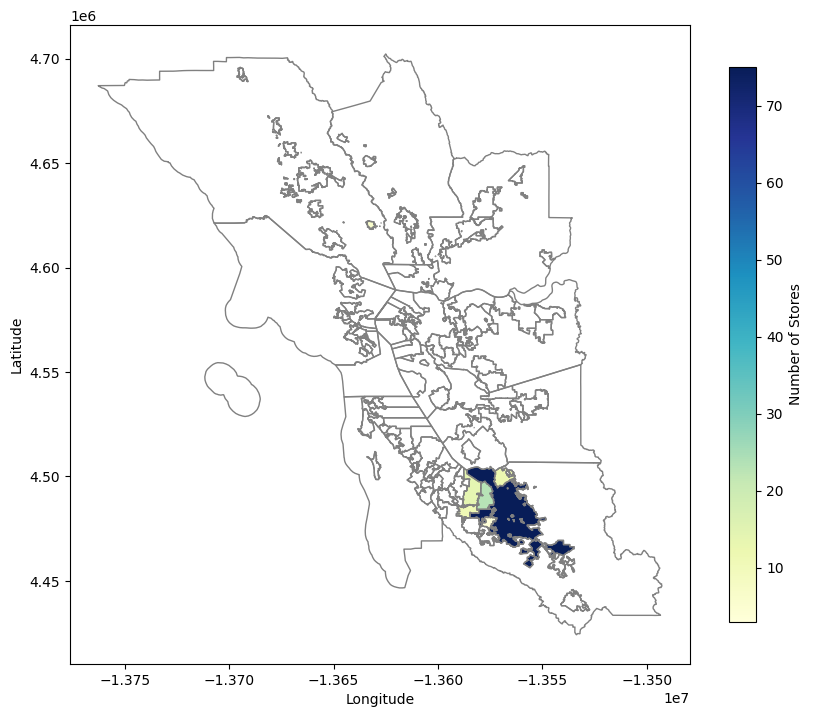

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 5: Count the number of stores in each city
store_counts = Store_data['Store_Location'].value_counts().reset_index()
store_counts.columns = ['City', 'Store_Count']

# Load the shapefile of Bay Area cities and towns
bay_area_map = gpd.read_file('City_and_County_Boundary_Line_Changes/BOE_CityCounty.shp')

# Step 2: Define the counties of interest
counties_of_interest = ['Alameda County', 'San Francisco County', 'Sonoma County', 'Contra Costa County',
                        'Napa County','Marin County','San Mateo County', 'Santa Clara County','Solano County']

# Step 3: Filter the map for the specified counties
bay_area_map_filtered = bay_area_map[bay_area_map['COUNTY'].isin(counties_of_interest)]

# Standardize city names to match the shapefile
store_counts['City'] = store_counts['City'].apply(lambda x: x.split(',')[0])  # Remove ", CA"

# Step 7: Merge the store count data with the filtered shapefile
bay_area_map_filtered['City'] = bay_area_map_filtered['CITY']  # Adjust based on your shapefile's column name
merged = bay_area_map_filtered.set_index('City').join(store_counts.set_index('City'))

# Plot 1: Map
fig, ax = plt.subplots(1, 1, figsize=(10, 9))  # Map plot
bay_area_map_filtered.boundary.plot(ax=ax, linewidth=1, color='grey')  # Plot boundaries
merged.plot(column='Store_Count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Stores", 'orientation': "vertical", 'shrink': 0.8},
            cmap='YlGnBu')  # Use a vibrant color scheme for the map

# Set title and labels for the map
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Save or display the map
plt.show()



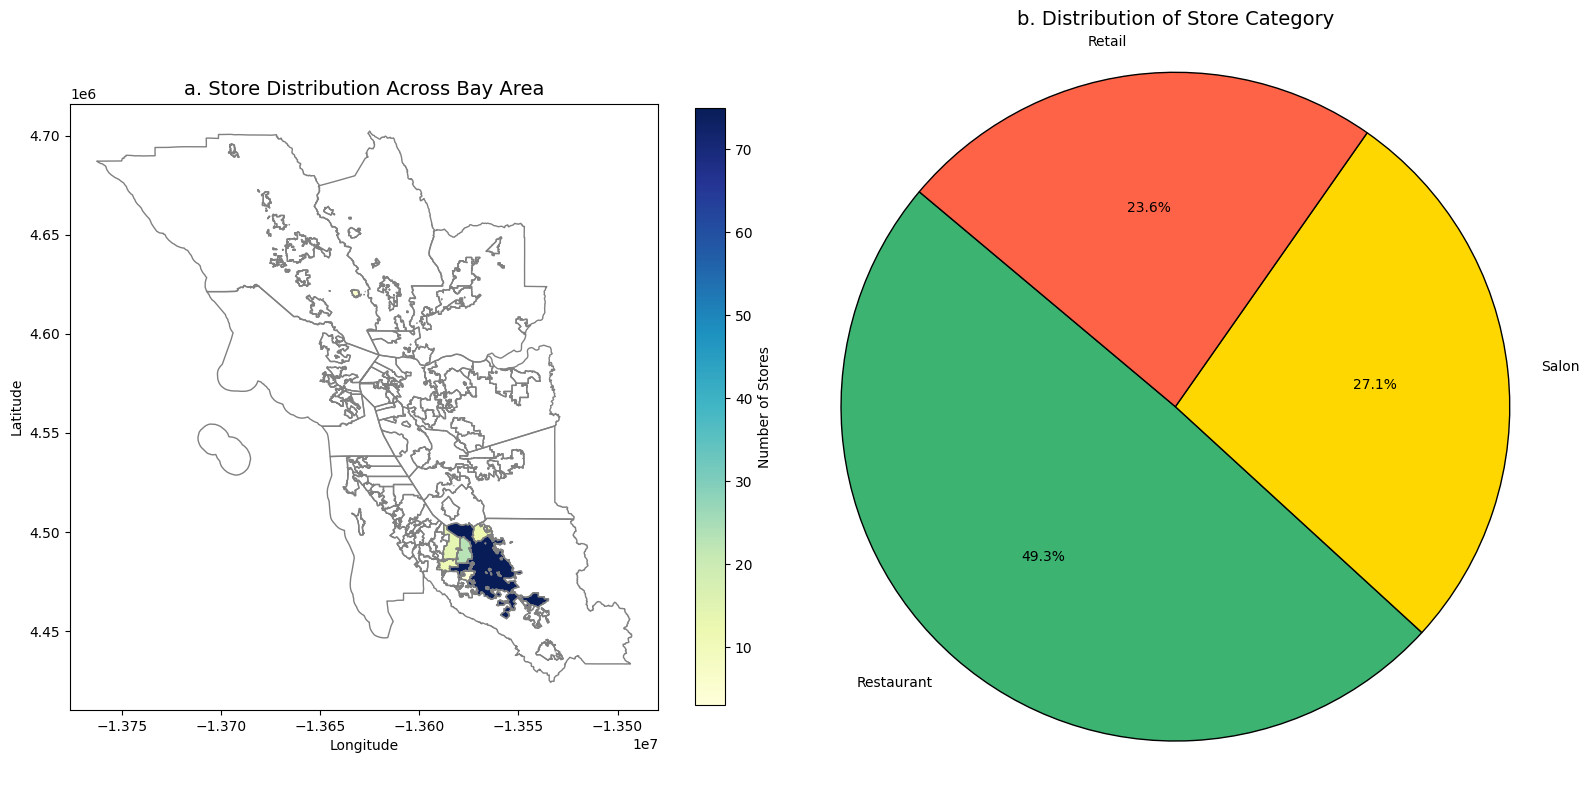

/var/folders/jh/9y_bmz351z11rkp4r34j4xsw0000gn/T/ipykernel_90412/3465260779.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rescaled_Paq2piq Class', data=Store_data, palette='Set2',


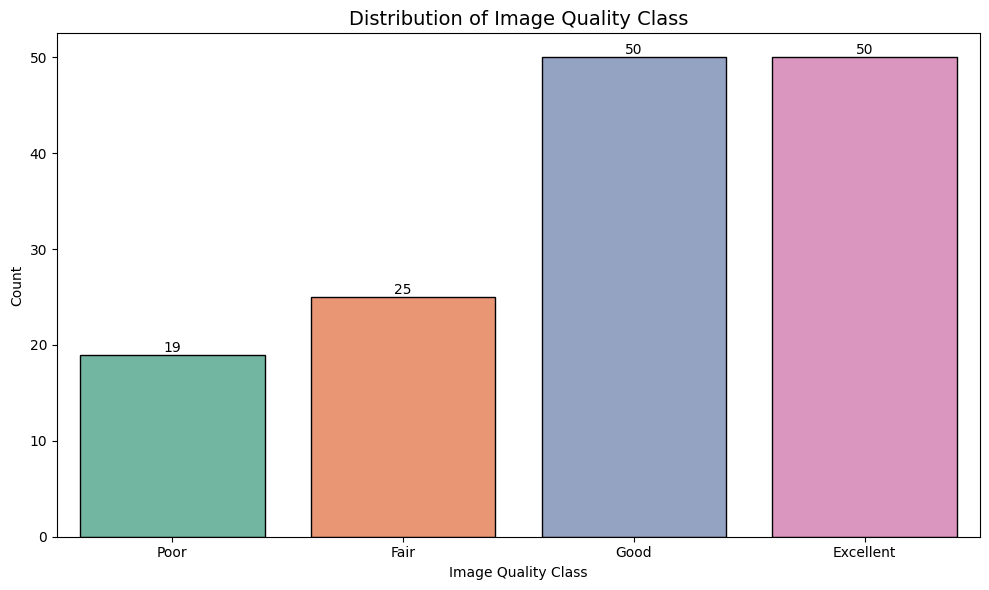

In [47]:
# Create a figure for combined plots (a and b)
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Create 1 row with 2 plots

# Plot 1: Map
bay_area_map_filtered.boundary.plot(ax=axs[0], linewidth=1, color='grey')  # Plot boundaries
merged.plot(column='Store_Count', ax=axs[0], legend=True,
            legend_kwds={'label': "Number of Stores", 'orientation': "vertical", 'shrink': 0.8},
            cmap='YlGnBu')  # Use a vibrant color scheme for the map
axs[0].set_title('a. Store Distribution Across Bay Area', fontsize=14)
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

# Plot 2: Pie chart
folder_counts = Store_data['Folder_Name'].value_counts()
axs[1].pie(folder_counts, labels=folder_counts.index, autopct='%1.1f%%', startangle=140, 
           colors=[color_mapping[folder] for folder in folder_counts.index],
           wedgeprops={'edgecolor': 'black', 'linewidth': 1})  # Add black borders to the wedges
axs[1].set_title('b. Distribution of Store Category', fontsize=14)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout and spacing
plt.tight_layout()

# Show the combined figure
plt.show()

# Plot 3: Count plot (c)
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='Rescaled_Paq2piq Class', data=Store_data, palette='Set2', 
              order=['Poor', 'Fair', 'Good', 'Excellent'], edgecolor='black', ax=ax)
ax.set_title('Distribution of Image Quality Class', fontsize=14)
ax.set_xlabel('Image Quality Class')
ax.set_ylabel('Count')

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', fontsize=10)

# Disable grid lines for count plot
ax.grid(False)

# Show the standalone figure
plt.tight_layout()
plt.show()


/var/folders/jh/9y_bmz351z11rkp4r34j4xsw0000gn/T/ipykernel_90412/3750460364.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Folder_Name', y='Rescaled_NIMA Score', data=Store_data, palette='Set3', ax=axes[0])
/var/folders/jh/9y_bmz351z11rkp4r34j4xsw0000gn/T/ipykernel_90412/3750460364.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Folder_Name', y='Rescaled_Paq2piq Average Local Score', data=Store_data, palette='Set3', ax=axes[1])
/var/folders/jh/9y_bmz351z11rkp4r34j4xsw0000gn/T/ipykernel_90412/3750460364.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

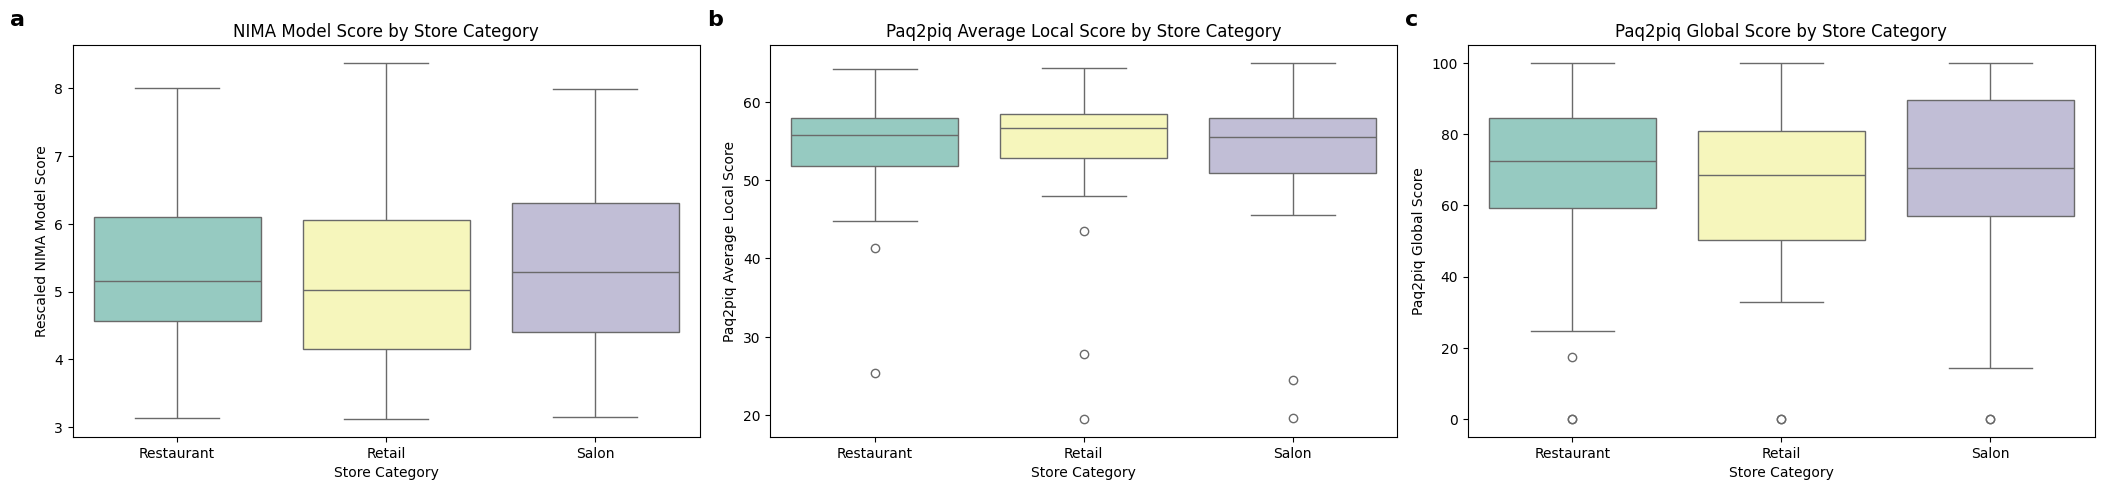

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure for 3 box plots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

# Plot 1: NIMA Model Score by Folder_Name
sns.boxplot(x='Folder_Name', y='Rescaled_NIMA Score', data=Store_data, palette='Set3', ax=axes[0])
axes[0].set_title('NIMA Model Score by Store Category')
axes[0].set_ylabel('Rescaled NIMA Model Score')
axes[0].set_xlabel('Store Category')
axes[0].grid(False)
axes[0].text(-0.1, 1.05, 'a', transform=axes[0].transAxes, fontsize=16, fontweight='bold')

# Plot 2: Paq2piq Local Score by Folder_Name
sns.boxplot(x='Folder_Name', y='Rescaled_Paq2piq Average Local Score', data=Store_data, palette='Set3', ax=axes[1])
axes[1].set_title('Paq2piq Average Local Score by Store Category')
axes[1].set_ylabel('Paq2piq Average Local Score')
axes[1].set_xlabel('Store Category')
axes[1].grid(False)
axes[1].text(-0.1, 1.05, 'b', transform=axes[1].transAxes, fontsize=16, fontweight='bold')

# Plot 3: Paq2piq Global Score by Folder_Name
sns.boxplot(x='Folder_Name', y='Rescaled_Paq2piq Normalized Global Score', data=Store_data, palette='Set3', ax=axes[2])
axes[2].set_title('Paq2piq Global Score by Store Category')
axes[2].set_ylabel('Paq2piq Global Score')
axes[2].set_xlabel('Store Category')
axes[2].grid(False)
axes[2].text(-0.1, 1.05, 'c', transform=axes[2].transAxes, fontsize=16, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


In [49]:
#conda install -c conda-forge wordcloud -y 
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from matplotlib.colors import LinearSegmentedColormap
import nltk

# NLTK Stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text clean (updated for phrases)
def clean_text_phrases(text):
    # Replace non-alphanumeric characters (except spaces) with nothing
    text = re.sub(r'[^\w\s]', '', text)
    # Replace spaces in phrases with underscores to preserve multi-word phrases
    text = re.sub(r'(\b\w+\s\w+\b)', lambda m: m.group(1).replace(' ', '_'), text)
    words = text.lower().split()
    # Filter out stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sherry_yu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


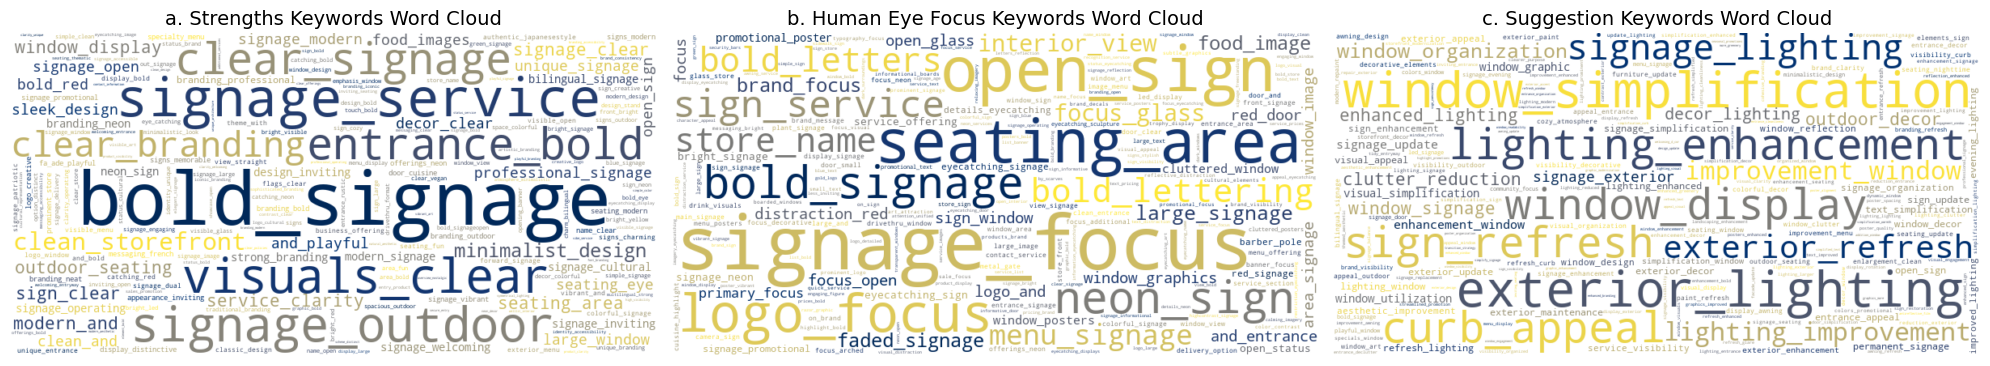

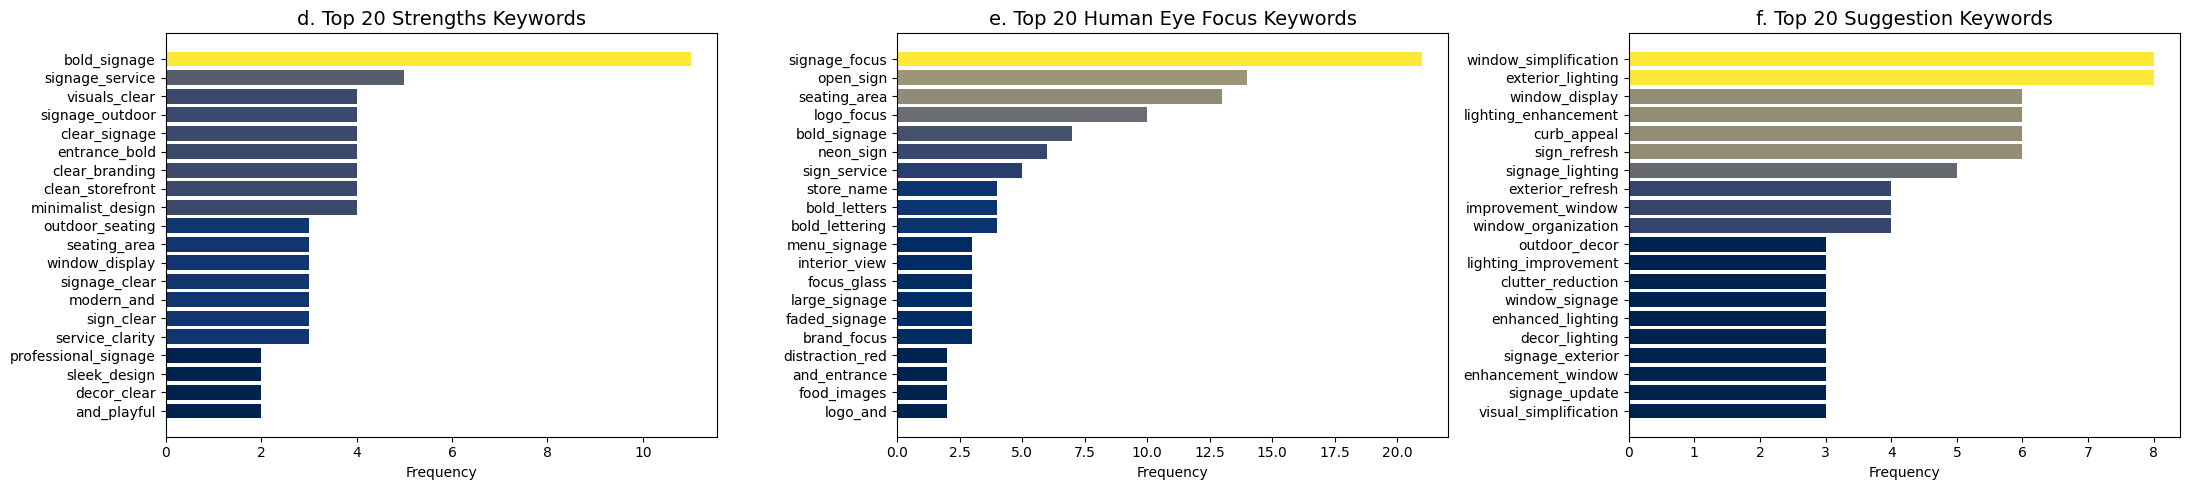

In [50]:
#############Keyword Analysis of Storefront Strengths, Eye Focus, and Suggestions#############
# Generate Word Cloud
def generate_wordcloud_subplot(ax, text, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=14)

# Generate Bar Chart
def plot_bar_subplot(ax, text, title, colormap):
    words = text.split()
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(20)
    keywords, counts = zip(*most_common_words)
    
    cmap = plt.get_cmap(colormap)
    norm = plt.Normalize(vmin=min(counts), vmax=max(counts))
    colors = [cmap(norm(value)) for value in counts]
    
    ax.barh(keywords, counts, color=colors)
    ax.invert_yaxis()
    ax.set_xlabel('Frequency')
    ax.set_title(title, fontsize=14)

# Cleaned text data (processed for phrases)
strengths_text = clean_text_phrases(' '.join(Store_data['Strengths_Keywords'].dropna()))
focus_text = clean_text_phrases(' '.join(Store_data['Human Eye Focus_Keywords'].dropna()))
suggestion_text = clean_text_phrases(' '.join(Store_data['Suggestion_Keywords'].dropna()))

# Create a figure for Word Clouds
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
generate_wordcloud_subplot(axes[0], strengths_text, 'a. Strengths Keywords Word Cloud', 'cividis')
generate_wordcloud_subplot(axes[1], focus_text, 'b. Human Eye Focus Keywords Word Cloud', 'cividis')
generate_wordcloud_subplot(axes[2], suggestion_text, 'c. Suggestion Keywords Word Cloud', 'cividis')
plt.tight_layout()
plt.show()

# Create a figure for Bar Charts
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
plot_bar_subplot(axes[0], strengths_text, 'd. Top 20 Strengths Keywords', 'cividis')
plot_bar_subplot(axes[1], focus_text, 'e. Top 20 Human Eye Focus Keywords', 'cividis')
plot_bar_subplot(axes[2], suggestion_text, 'f. Top 20 Suggestion Keywords', 'cividis')
plt.tight_layout()
plt.show()


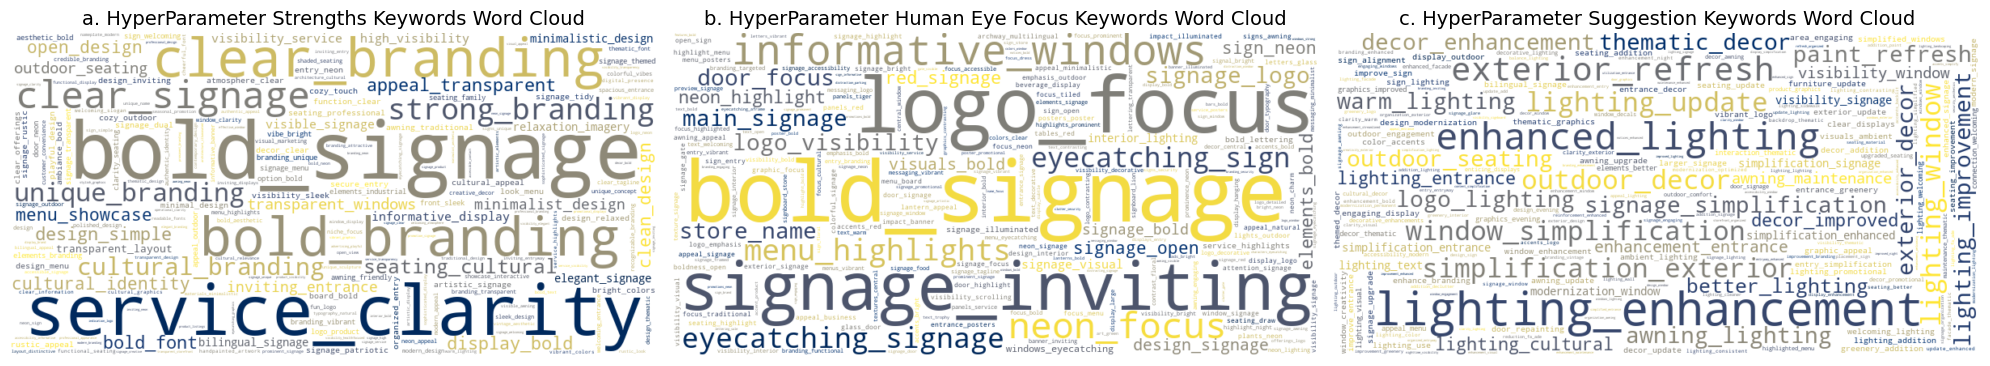

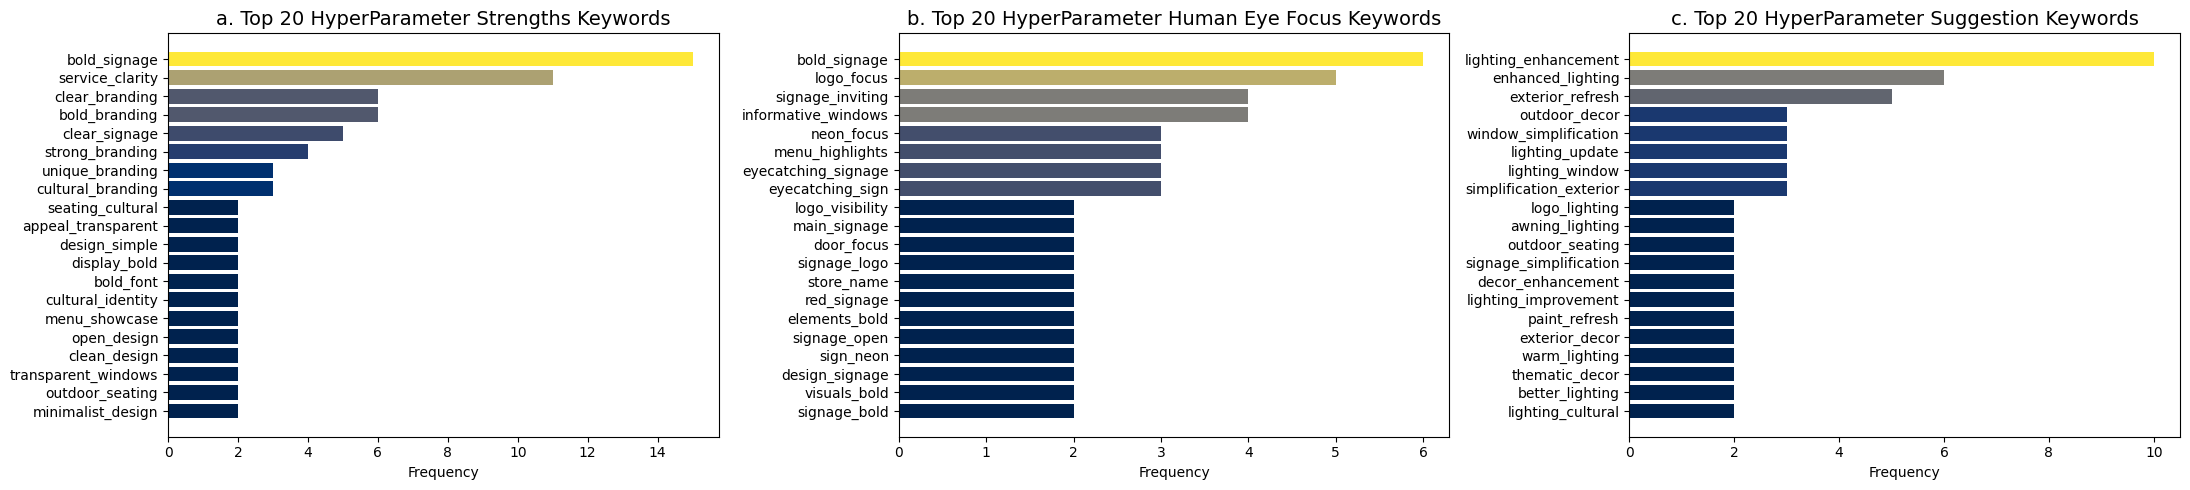

In [51]:
######Hyper Parameter Processed Keyword Word Cloud Analysis of Storefront Strengths, Eye Focus, and Suggestions
# Generate Word Cloud
def generate_wordcloud_subplot(ax, text, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=14)

# Generate Bar Chart
def plot_bar_subplot(ax, text, title, colormap):
    words = text.split()
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(20)
    keywords, counts = zip(*most_common_words)
    
    cmap = plt.get_cmap(colormap)
    norm = plt.Normalize(vmin=min(counts), vmax=max(counts))
    colors = [cmap(norm(value)) for value in counts]
    
    ax.barh(keywords, counts, color=colors)
    ax.invert_yaxis()
    ax.set_xlabel('Frequency')
    ax.set_title(title, fontsize=14)

# Cleaned text data for the new columns (processed for phrases)
improved_strengths_text = clean_text_phrases(' '.join(Store_data['HyperParameter_Strengths_Keywords'].dropna()))
improved_focus_text = clean_text_phrases(' '.join(Store_data['HyperParameter_Human Eye Focus_Keywords'].dropna()))
improved_suggestion_text = clean_text_phrases(' '.join(Store_data['HyperParameter_Suggestion_Keywords'].dropna()))

# Create a figure for Word Clouds
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
generate_wordcloud_subplot(axes[0], improved_strengths_text, 'a. HyperParameter Strengths Keywords Word Cloud', 'cividis')
generate_wordcloud_subplot(axes[1], improved_focus_text, 'b. HyperParameter Human Eye Focus Keywords Word Cloud', 'cividis')
generate_wordcloud_subplot(axes[2], improved_suggestion_text, 'c. HyperParameter Suggestion Keywords Word Cloud', 'cividis')
plt.tight_layout()
plt.show()

# Create a figure for Bar Charts
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
plot_bar_subplot(axes[0], improved_strengths_text, 'a. Top 20 HyperParameter Strengths Keywords', 'cividis')
plot_bar_subplot(axes[1], improved_focus_text, 'b. Top 20 HyperParameter Human Eye Focus Keywords', 'cividis')
plot_bar_subplot(axes[2], improved_suggestion_text, 'c. Top 20 HyperParameter Suggestion Keywords', 'cividis')
plt.tight_layout()
plt.show()


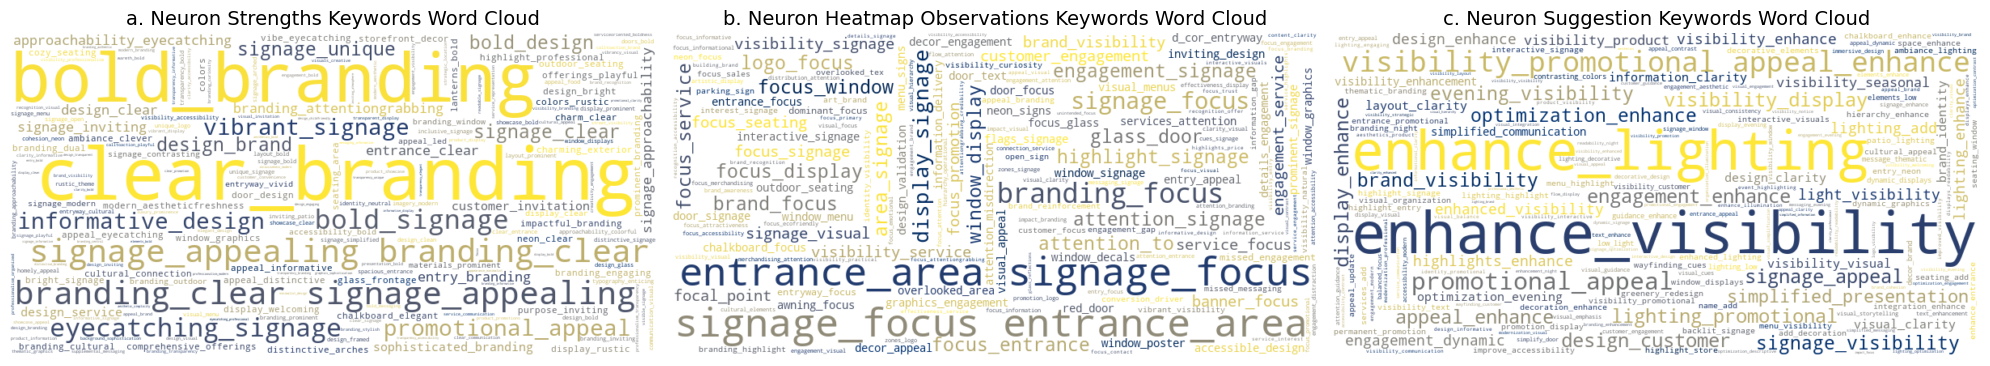

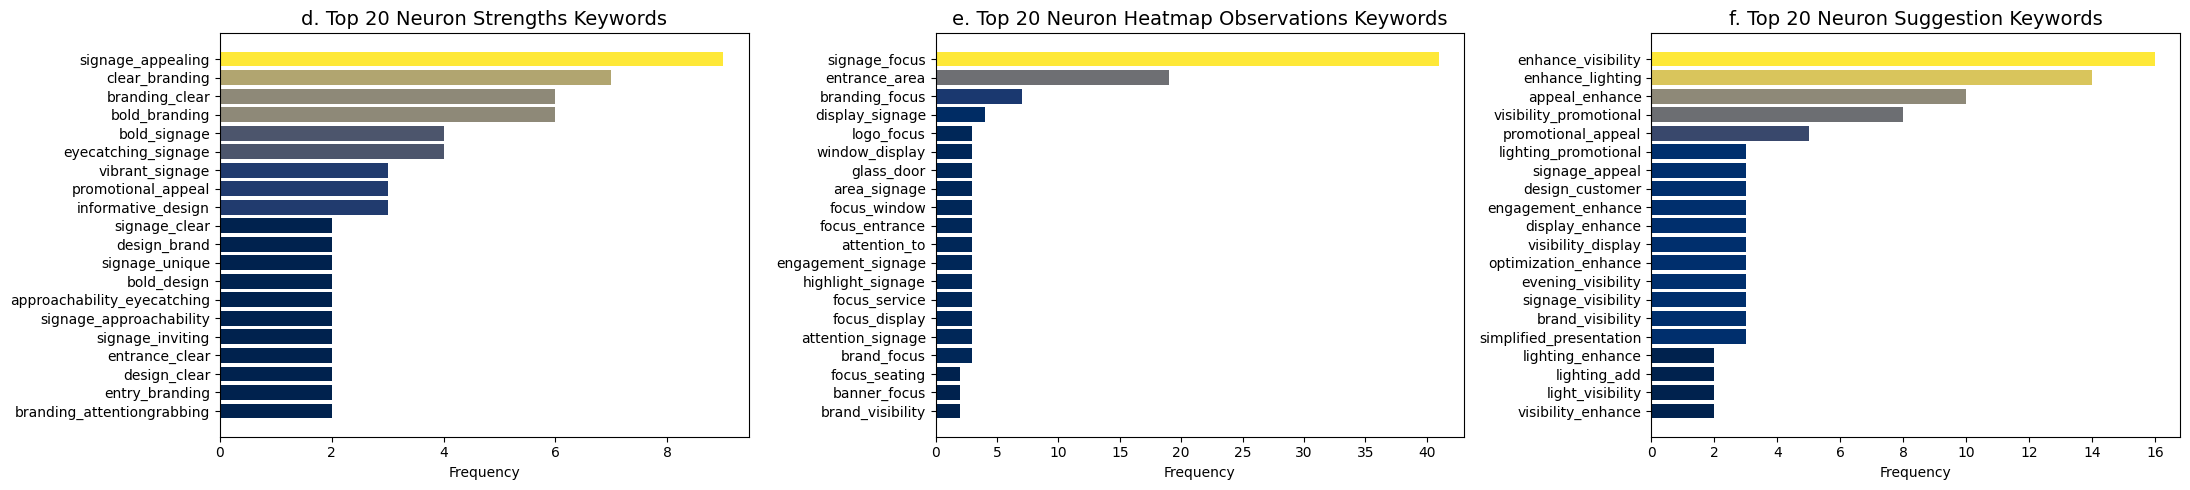

In [52]:
######## Neuron Processed Keyword Word Cloud Analysis of Storefront Strengths, Eye Focus, and Suggestions ########
# Generate Word Cloud
def generate_wordcloud_subplot(ax, text, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=14)

# Generate Bar Chart
def plot_bar_subplot(ax, text, title, colormap):
    words = text.split()
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(20)
    keywords, counts = zip(*most_common_words)
    
    cmap = plt.get_cmap(colormap)
    norm = plt.Normalize(vmin=min(counts), vmax=max(counts))
    colors = [cmap(norm(value)) for value in counts]
    
    ax.barh(keywords, counts, color=colors)
    ax.invert_yaxis()
    ax.set_xlabel('Frequency')
    ax.set_title(title, fontsize=14)

# Cleaned text data for the new columns (processed for phrases)
improved_strengths_text = clean_text_phrases(' '.join(Store_data['Neuron_Strengths_Keywords'].dropna()))
improved_focus_text = clean_text_phrases(' '.join(Store_data['Neuron_Heatmap_Observations_Keywords'].dropna()))
improved_suggestion_text = clean_text_phrases(' '.join(Store_data['Neuron_Suggestion_Keywords'].dropna()))

# Create a figure for Word Clouds
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
generate_wordcloud_subplot(axes[0], improved_strengths_text, 'a. Neuron Strengths Keywords Word Cloud', 'cividis')
generate_wordcloud_subplot(axes[1], improved_focus_text, 'b. Neuron Heatmap Observations Keywords Word Cloud', 'cividis')
generate_wordcloud_subplot(axes[2], improved_suggestion_text, 'c. Neuron Suggestion Keywords Word Cloud', 'cividis')
plt.tight_layout()
plt.show()

# Create a figure for Bar Charts
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
plot_bar_subplot(axes[0], improved_strengths_text, 'd. Top 20 Neuron Strengths Keywords', 'cividis')
plot_bar_subplot(axes[1], improved_focus_text, 'e. Top 20 Neuron Heatmap Observations Keywords', 'cividis')
plot_bar_subplot(axes[2], improved_suggestion_text, 'f. Top 20 Neuron Suggestion Keywords', 'cividis')
plt.tight_layout()
plt.show()


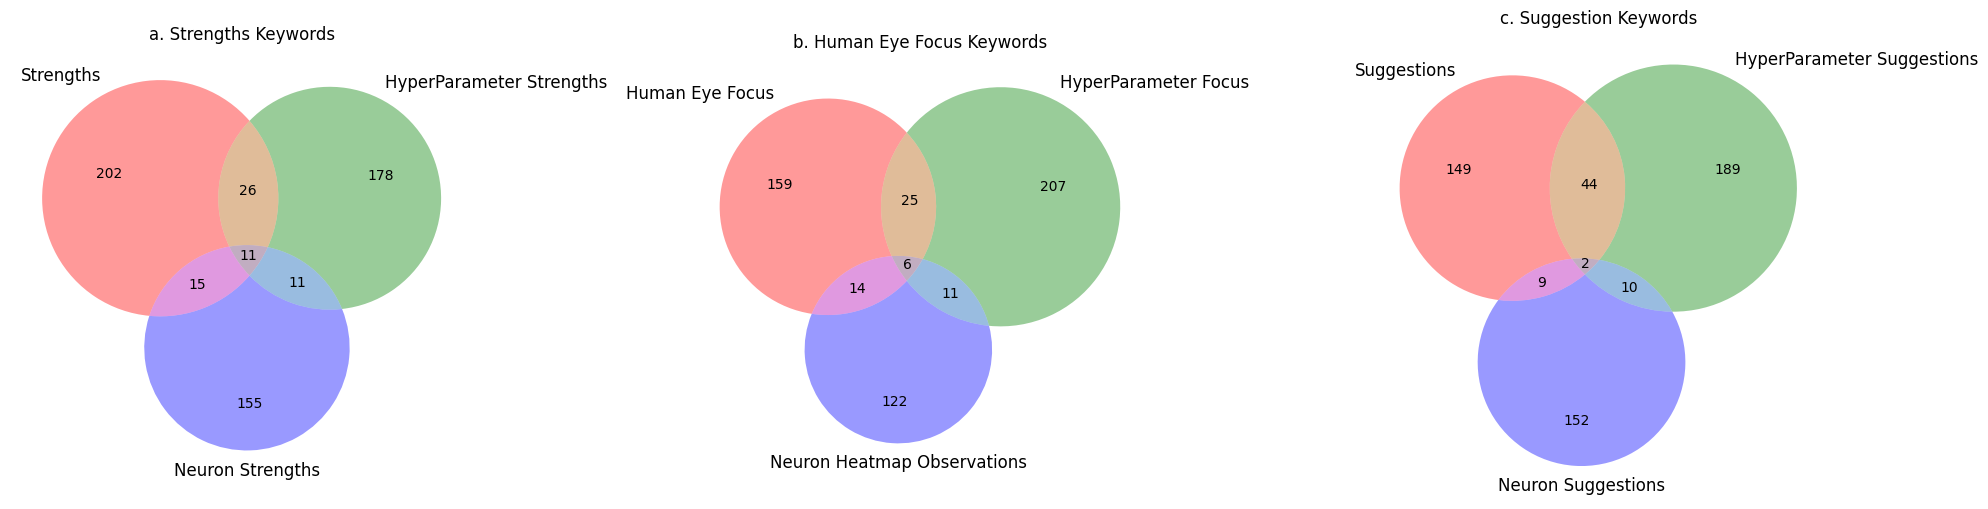

In [53]:
import matplotlib_venn
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

# Helper function to clean and extract unique keywords
def get_unique_keywords(data, column_name):
    return set(clean_text_phrases(' '.join(data[column_name].dropna())).split())

# Extract unique keywords for each group
strengths_keywords = get_unique_keywords(Store_data, 'Strengths_Keywords')
hyperparameter_strengths_keywords = get_unique_keywords(Store_data, 'HyperParameter_Strengths_Keywords')
neuron_strengths_keywords = get_unique_keywords(Store_data, 'Neuron_Strengths_Keywords')

focus_keywords = get_unique_keywords(Store_data, 'Human Eye Focus_Keywords')
hyperparameter_focus_keywords = get_unique_keywords(Store_data, 'HyperParameter_Human Eye Focus_Keywords')
neuron_focus_keywords = get_unique_keywords(Store_data, 'Neuron_Heatmap_Observations_Keywords')

suggestion_keywords = get_unique_keywords(Store_data, 'Suggestion_Keywords')
hyperparameter_suggestion_keywords = get_unique_keywords(Store_data, 'HyperParameter_Suggestion_Keywords')
neuron_suggestion_keywords = get_unique_keywords(Store_data, 'Neuron_Suggestion_Keywords')

# Plot Venn diagrams for each group
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Strengths Keywords Venn Diagram
plt.sca(axes[0])
venn3(
    [strengths_keywords, hyperparameter_strengths_keywords, neuron_strengths_keywords],
    ('Strengths', 'HyperParameter Strengths', 'Neuron Strengths')
)
plt.title("a. Strengths Keywords")

# Human Eye Focus Keywords Venn Diagram
plt.sca(axes[1])
venn3(
    [focus_keywords, hyperparameter_focus_keywords, neuron_focus_keywords],
    ('Human Eye Focus', 'HyperParameter Focus', 'Neuron Heatmap Observations')
)
plt.title("b. Human Eye Focus Keywords")

# Suggestion Keywords Venn Diagram
plt.sca(axes[2])
venn3(
    [suggestion_keywords, hyperparameter_suggestion_keywords, neuron_suggestion_keywords],
    ('Suggestions', 'HyperParameter Suggestions', 'Neuron Suggestions')
)
plt.title("c. Suggestion Keywords")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
import nltk
from collections import Counter
from matplotlib.ticker import MaxNLocator

# NLTK Stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text cleaning for phrases
def clean_text_phrases(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-alphanumeric characters
    text = re.sub(r'(\b\w+\s\w+\b)', lambda m: m.group(1).replace(' ', '_'), text)  # Handle multi-word phrases
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Generate Word Cloud
def generate_wordcloud(text, colormap='viridis'):
    return WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text)

# Generate Bar Chart
def generate_bar_chart(text, ax, title):
    word_counts = Counter(text.split())
    top_keywords = word_counts.most_common(10)  # Top 10 keywords
    sorted_keywords = sorted(top_keywords, key=lambda x: x[1], reverse=False)
    words, counts = zip(*sorted_keywords) if sorted_keywords else ([], [])
    ax.barh(words, counts, color='skyblue')
    ax.set_title(f"Top 10 Praises For {title}", fontsize=10)  # Modify title to include "Top 10 praises"
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Keywords')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure x-axis uses integer ticks only

# Combine keyword columns
Store_data['Merged_Strengths_Keywords'] = Store_data[
    ['Strengths_Keywords', 'HyperParameter_Strengths_Keywords', 'Neuron_Strengths_Keywords']
].apply(lambda row: ' '.join(row.dropna()), axis=1)

Store_data['Merged_HumanEyeFocus_Keywords'] = Store_data[
    ['Human Eye Focus_Keywords', 'HyperParameter_Human Eye Focus_Keywords', 'Neuron_Heatmap_Observations_Keywords']
].apply(lambda row: ' '.join(row.dropna()), axis=1)

Store_data['Merged_Suggestion_Keywords'] = Store_data[
    ['Suggestion_Keywords', 'HyperParameter_Suggestion_Keywords', 'Neuron_Suggestion_Keywords']
].apply(lambda row: ' '.join(row.dropna()), axis=1)

#Save new data
Store_data.to_csv('FrontDoorImage_Merge.csv', index=False)

# Define merged keyword columns
merged_columns = [
    'Merged_Strengths_Keywords', 
    'Merged_HumanEyeFocus_Keywords', 
    'Merged_Suggestion_Keywords'
]
titles = ['Strengths', 'Human Eye Focus', 'Suggestions']



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sherry_yu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


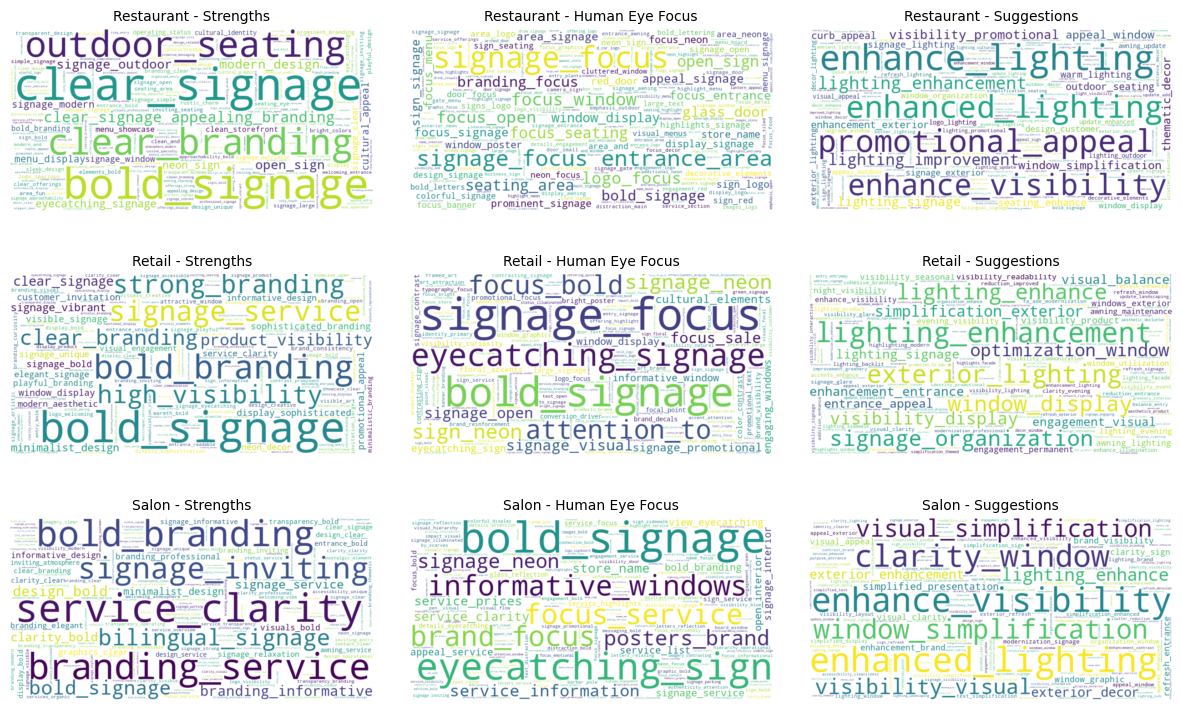

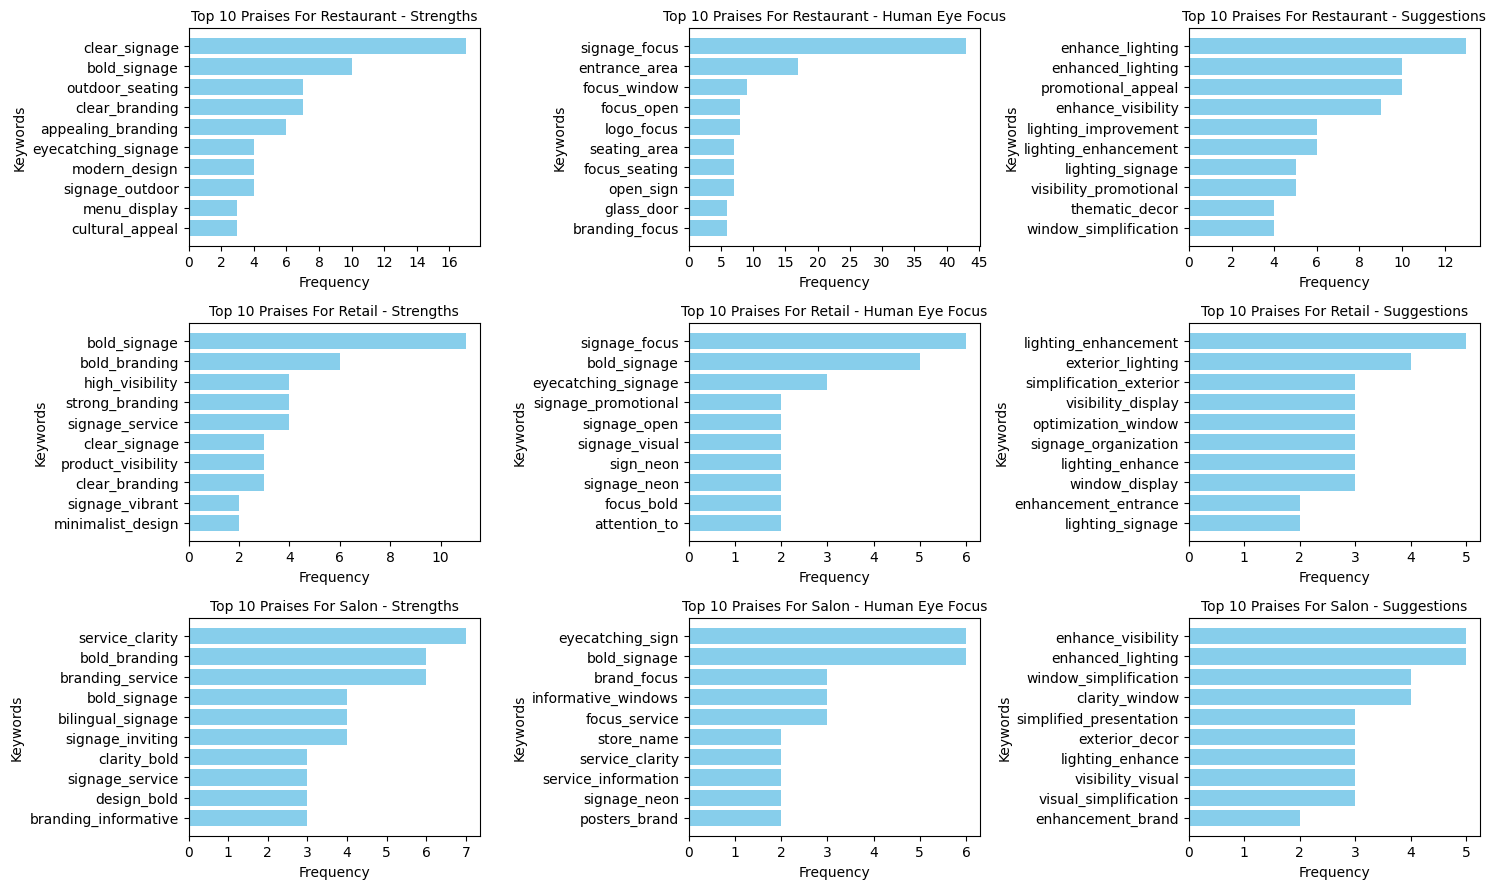

In [55]:
# Unique Folder Names
folders = Store_data['Folder_Name'].unique()

# Prepare figure for WordClouds
fig_wordcloud, axes_wordcloud = plt.subplots(len(folders), len(merged_columns), figsize=(15, 3 * len(folders)))
plt.subplots_adjust(hspace=0.2, wspace=0.1)

# Prepare figure for Bar Charts
fig_bar, axes_bar = plt.subplots(len(folders), len(merged_columns), figsize=(15, 3 * len(folders)))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Plot WordClouds and BarCharts for the first part (Folder-based)
for i, folder in enumerate(folders):
    for j, column in enumerate(merged_columns):
        # Filter data for current folder and column
        text_data = Store_data[Store_data['Folder_Name'] == folder][column].dropna()
        cleaned_text = clean_text_phrases(' '.join(text_data))
        
        # Word Cloud Plot
        if cleaned_text:  # Ensure there is data to plot
            wordcloud = generate_wordcloud(cleaned_text, 'viridis')
            ax = axes_wordcloud[i, j]
            ax.imshow(wordcloud, interpolation='bilinear')
            ax.axis('off')
            ax.set_title(f"{folder} - {titles[j]}", fontsize=10)
        else:
            # No data for this combination
            ax = axes_wordcloud[i, j]
            ax.axis('off')
            ax.set_title(f"{folder} - {titles[j]}", fontsize=10)
        
        # Bar Chart Plot
        if cleaned_text:  # Only plot if there's text
            ax = axes_bar[i, j]
            generate_bar_chart(cleaned_text, ax, f"{folder} - {titles[j]}")  # Modify bar chart title
        else:
            ax = axes_bar[i, j]
            ax.axis('off')

# Show the WordCloud and Bar Chart plots
plt.tight_layout()
plt.show()


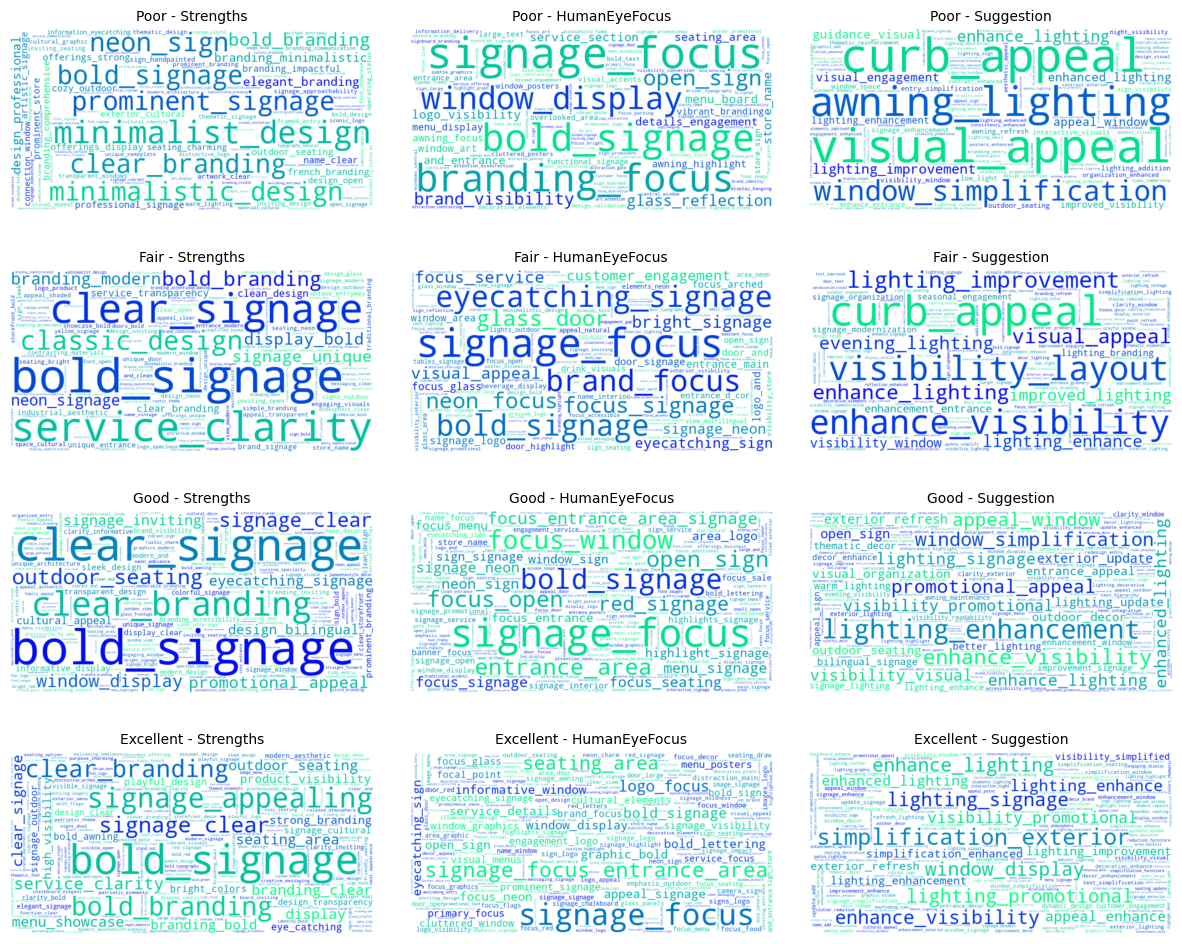

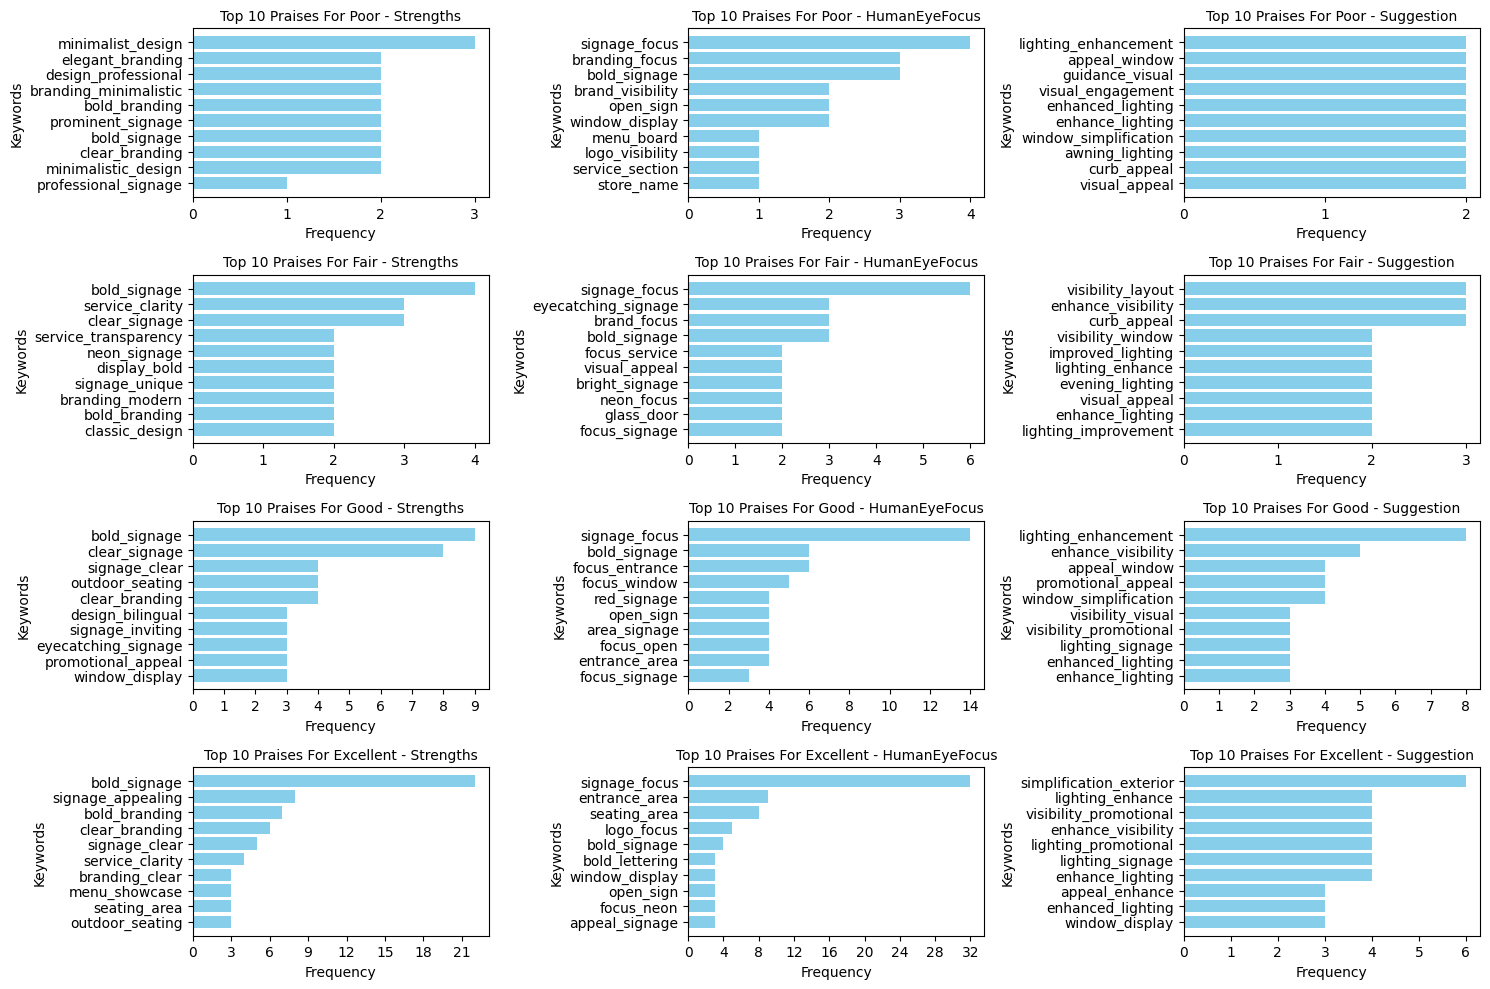

In [56]:
# Unique Paq2piq Classes
classes = ['Poor', 'Fair', 'Good', 'Excellent']

# Prepare figure for WordClouds based on Paq2piq Class
fig_wordcloud_class, axes_wordcloud_class = plt.subplots(len(classes), len(merged_columns), figsize=(15, 3 * len(classes)))
plt.subplots_adjust(hspace=0.2, wspace=0.1)

# Prepare figure for Bar Charts based on Paq2piq Class
fig_bar_class, axes_bar_class = plt.subplots(len(classes), len(merged_columns), figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Function to create WordClouds for each class
def plot_wordclouds(data, classes, merged_columns, ax, colormap='winter'):
    for i, class_ in enumerate(classes):
        for j, column in enumerate(merged_columns):
            text_data = data[data['Rescaled_Paq2piq Class'] == class_][column].dropna()
            cleaned_text = clean_text_phrases(' '.join(text_data))
            if cleaned_text:
                wordcloud = generate_wordcloud(cleaned_text, colormap)
                ax[i, j].imshow(wordcloud, interpolation='bilinear')
                ax[i, j].axis('off')
                ax[i, j].set_title(f"{class_} - {column.split('_')[1]}", fontsize=10)
            else:
                ax[i, j].axis('off')
                ax[i, j].set_title(f"{class_} - {column.split('_')[1]}", fontsize=10)  # Updated title for empty plots

# Function to create Bar Charts for each class
def plot_bar_charts(data, classes, merged_columns, ax):
    for i, class_ in enumerate(classes):
        for j, column in enumerate(merged_columns):
            text_data = data[data['Rescaled_Paq2piq Class'] == class_][column].dropna()
            cleaned_text = clean_text_phrases(' '.join(text_data))
            if cleaned_text:
                generate_bar_chart(cleaned_text, ax[i, j], f"{class_} - {column.split('_')[1]}")  # Updated title
            else:
                ax[i, j].axis('off')

# Plot WordClouds and BarCharts for the second part (Class-based)
plot_wordclouds(Store_data, classes, merged_columns, axes_wordcloud_class)
plot_bar_charts(Store_data, classes, merged_columns, axes_bar_class)

# Show the plots for the second part
plt.tight_layout()
plt.show()
